<a href="https://colab.research.google.com/github/kronze1996/Capstone-Project-1/blob/main/Kartikey_Sharma_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
working_dir_path = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Data/'

EdStatsData_df = pd.read_csv(working_dir_path + 'Copy of EdStatsData.csv')
CountrySeries_df = pd.read_csv(working_dir_path + 'Copy of EdStatsCountry-Series.csv')
EdStatSeries_df = pd.read_csv(working_dir_path + 'Copy of EdStatsSeries.csv')
EdStatsCountry_df = pd.read_csv(working_dir_path + 'Copy of EdStatsCountry.csv')
EdStatsFootNote_df = pd.read_csv(working_dir_path + 'Copy of EdStatsFootNote.csv')

#0. Dropping unnamed and empty columns :

In [4]:
EdStatsData_df.drop(['Unnamed: 69'],axis=1,inplace=True)
CountrySeries_df.drop(['Unnamed: 3'],axis=1,inplace=True)
EdStatSeries_df.drop(['Unnamed: 20','License Type','Related indicators','Other web links'],axis=1,inplace=True)
EdStatsCountry_df.drop(['Unnamed: 31'],axis=1,inplace=True)
EdStatsFootNote_df.drop(['Unnamed: 4'],axis=1,inplace=True)

#1. EdStats Data :

In [28]:
EdStatsData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

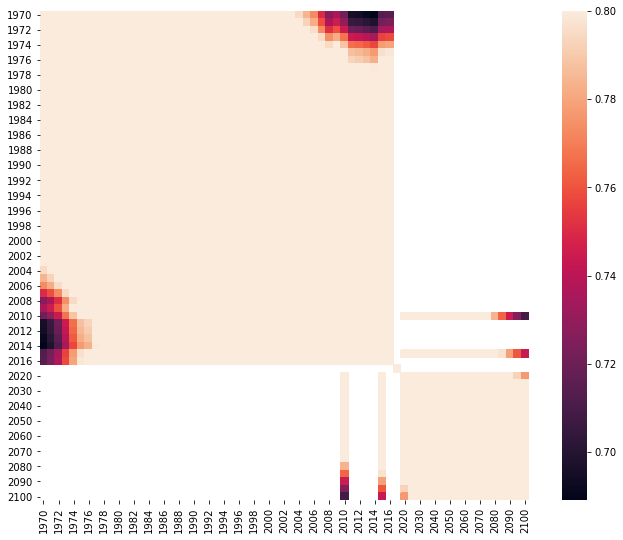

In [6]:
corrmat=EdStatsData_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

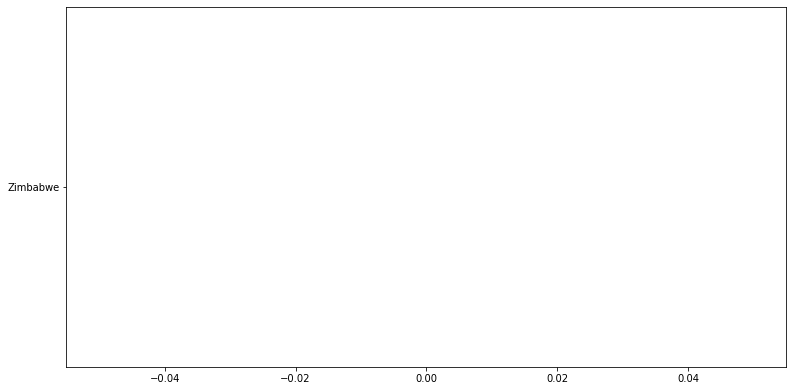

In [38]:
# Bar plot for one country

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
years = EdStatsData_df['2010'].head(20)
Country = EdStatsData_df['Country Name'].tail(20)
ax.bar(years,Country)
plt.show()


# var = 'GrLivArea'
# data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [25]:
grouped=EdStatsData_df.groupby(['Indicator Name','Country Name']).first()
# YearlyCountryStats_df=grouped.to_frame().reset_index()
# YearlyCountryStats_df.head()
grouped.head()

Country Code  ... 2100
Indicator Name                                     Country Name                 ...     
Adjusted net enrolment rate, lower secondary, b... Afghanistan             AFG  ...  NaN
                                                   Albania                 ALB  ...  NaN
                                                   Algeria                 DZA  ...  NaN
                                                   American Samoa          ASM  ...  NaN
                                                   Andorra                 AND  ...  NaN

[5 rows x 67 columns]

Text(0.5, 0, 'percent')

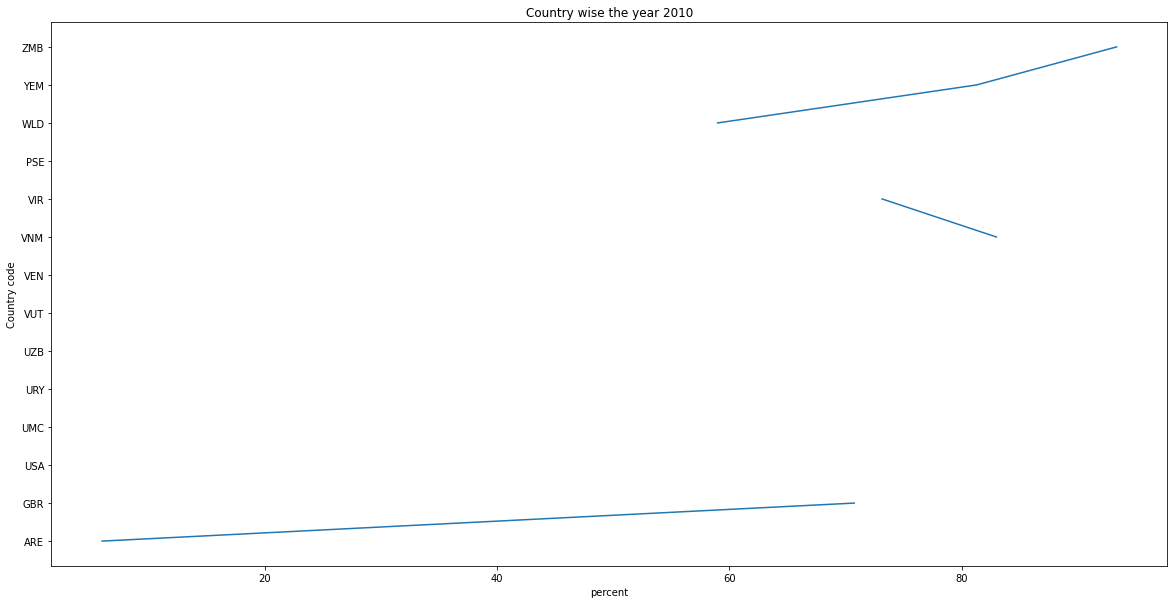

In [32]:
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(grouped['2010'].head(20),grouped["Country Code"].tail(20))
plt.title('Country wise the year 2010')
plt.ylabel('Country code')
plt.xlabel('percent')

In [ ]:
grouped.plot(x='month_number',y=['facewash','facecream'],kind='bar')
plt.title('Monthly Sales of Facewash and Facecream')
plt.ylabel('Units Sold')
plt.xlabel('Month Number')

In [ ]:

# EdStatsData_df[['Country Name','Country Code','Indicator Code','1970'	,'1971'	,'1972'	,'1973',	'1974',	'1975'	,'1976',	'1977',	'1978'	,'1979'	,'1980']].tail(20)
# sample=EdStatsData_df.groupby("Indicator Code")

# Capturing Indicator names :


indicator_counts= dict(Counter(EdStatsData_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names

# Capturing Country names


['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

#2. Country Series Data :

In [47]:
CountrySeries_df.info()
#Contains repeated data....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


In [45]:
CountrySeries_df.groupby("CountryCode").first()

,SeriesCode,DESCRIPTION
CountryCode,,
ABW,SP.POP.TOTL,Data sources : United Nations World Population...
AFG,SP.POP.GROW,Data sources: United Nations World Population ...
AGO,SP.POP.TOTL,Data sources : United Nations World Population...
ALB,SP.POP.GROW,Data sources: United Nations World Population ...
AND,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...
XKX,SP.POP.TOTL,Data sources : World Bank's Kosovo coutnry off...
YEM,SP.POP.GROW,Data sources: United Nations World Population ...
ZAF,SP.POP.TOTL,"Data sources : Statistics South Africa, United..."


#3. EdStatSeries Data :

In [ ]:
EdStatSeries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

#4. EdStatsCountry Data :

In [ ]:
EdStatsCountry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [ ]:
EdStatsCountry_df[EdStatsCountry_df['Table Name']=='India']

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
98,IND,India,India,Republic of India,IN,Indian rupee,Fiscal year end: March 31; reporting period fo...,South Asia,Lower middle income,IN,2004/05,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2005/06","Integrated household survey (IHS), 2012",NaN,2011,2009.0,2012.0,2010


#5. EdStatsFootNote Data :

In [ ]:
EdStatsFootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB


#Observation for data wrangling:
-Total 195 countries (215 given)
-

#Summary:
1. Fake Columns named (unamed) having zero data (Done) 